<a href="https://colab.research.google.com/github/dhairyachandra/CSEE5590-Python-Deep-Learning-Programming/blob/master/Lab2/Source/Ques3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


   Label     Latin Name             ...  Train Images    Validation Images
0  n0         alouatta_palliata\t   ...            131                  26
1  n1        erythrocebus_patas\t   ...            139                  28
2  n2        cacajao_calvus\t       ...            137                  27
3  n3        macaca_fuscata\t       ...            152                  30
4  n4       cebuella_pygmea\t       ...            131                  26
5  n5       cebus_capucinus\t       ...            141                  28
6  n6       mico_argentatus\t       ...            132                  26
7  n7      saimiri_sciureus\t       ...            142                  28
8  n8       aotus_nigriceps\t       ...            133                  27
9  n9       trachypithecus_johnii   ...            132                  26

[10 rows x 5 columns]
Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
Epoch 1/2
33/32 [==============================] - 30s 914ms/step -

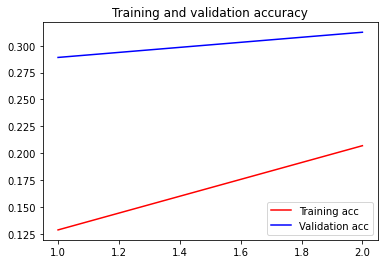

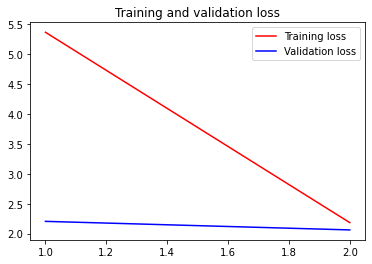

In [1]:
import matplotlib.pylab as plt
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization, Input
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from pathlib import Path
from keras.optimizers import Adam,RMSprop,SGD
import pandas as pd
 
df = pd.read_csv("/content/drive/My Drive/UMKC/Colab Files/monkey_labels.txt")
print(df)
 
height=150
width=150
channels=3
batch_size=32
seed=1337
 
train_dir = Path('/content/drive/My Drive/UMKC/Colab Files/training')
test_dir = Path('/content/drive/My Drive/UMKC/Colab Files/validation')
 
# Training generator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    class_mode='categorical')
 
# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(height,width),
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  class_mode='categorical')
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(10, activation='softmax'))
 
model.compile(Adam(lr=0.0001),loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit_generator(train_generator,
        steps_per_epoch= 1027/batch_size,
          epochs=2,
          verbose=1,
          validation_data=test_generator,
                    validation_steps= 4)
 
model.summary()
print(history.history.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
 
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()
plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
 
plt.legend()
plt.show()